## 1. Importing Libraries

In [11]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Importing Data

In [12]:
df= pd.read_csv("forestfires.csv")


## 3. Data Understanding

In [13]:
print('No. of observations:{}\nNo. of features:{}'.format(df.shape[0],df.shape[1]))

No. of observations:517
No. of features:31


In [14]:
df[df.columns[0:11]].describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [15]:
df[df.columns[0:11]].isnull().sum()

month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

### Finding Correlation

In [16]:
corr= df[df.columns[0:11]].corr()

<Axes: >

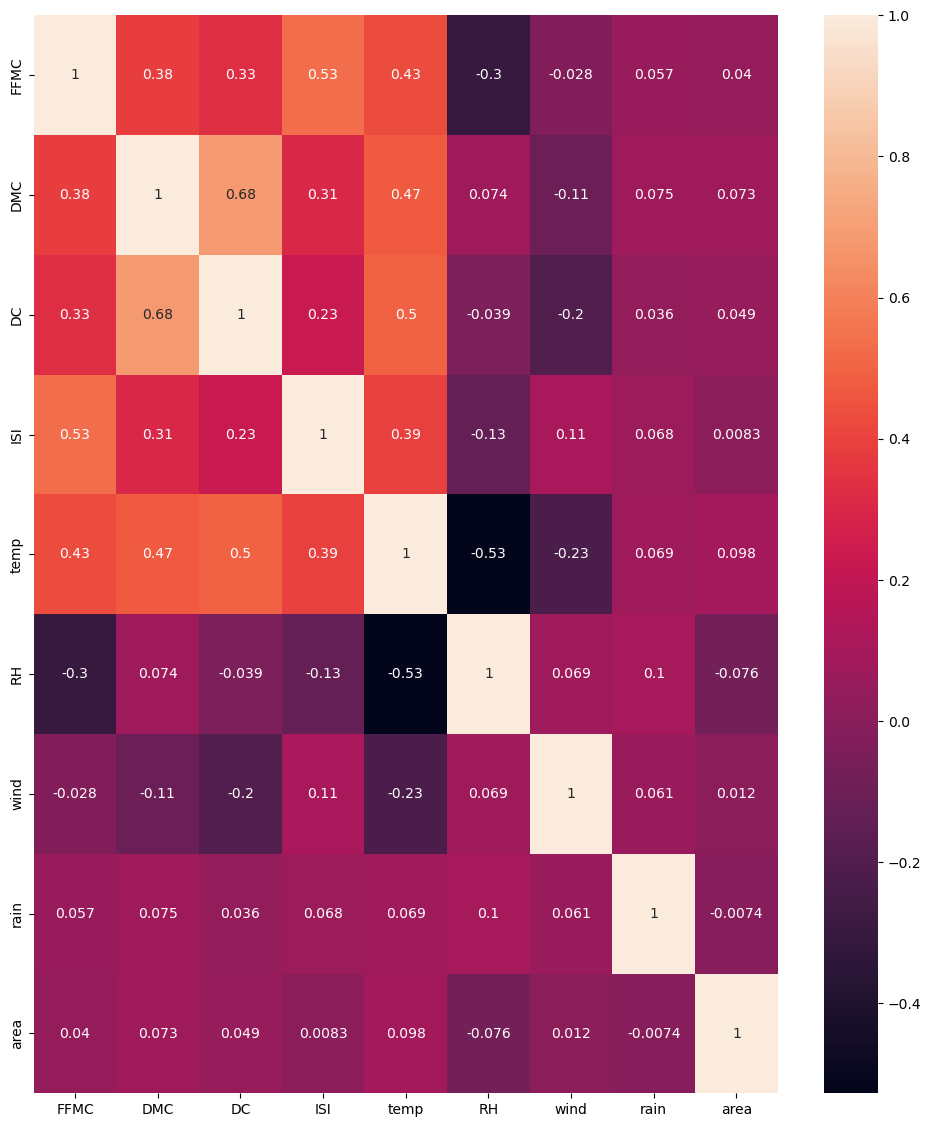

In [17]:
plt.figure(figsize=(12,14))
sns.heatmap(corr,annot=True)

## 4. SVM

In [18]:
X= df.iloc[:,2:30]
y= df.iloc[:,30]

In [19]:
mapping= {'small': 1, 'large': 2}

In [20]:
y= y.replace(mapping)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state=1)

###  Linear

In [28]:
model_linear= SVC(kernel= "linear")
model_linear.fit(x_train,y_train)
pred_test_linear= model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 1.0


###  Poly

In [29]:
model_poly= SVC(kernel= "poly")
model_poly.fit(x_train,y_train)
pred_test_poly= model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.7788461538461539


###  RBF

In [30]:
model_rbf= SVC(kernel= "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf= model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.7596153846153846


### Sigmoid

In [31]:
model_sigmoid= SVC(kernel= "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid= model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.6153846153846154


## 4 - Conclusion



## Linear Model gives the best accuracy